<a href="https://colab.research.google.com/github/AbbasSalami/ML_Tutorial/blob/main/ML_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is a Machine Learning tutorial for everyone interested

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import datasets
import random
import time
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation, Dropout, BatchNormalization, Flatten, Conv2D, Conv1D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist

# IRIS dataset (DT, SVM, MLP)

Text(0, 0.5, 'sepal_w')

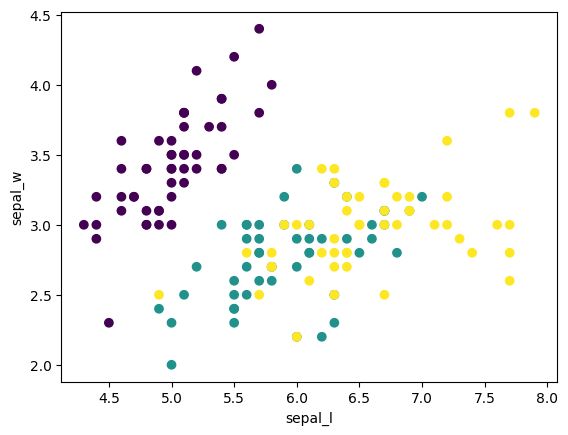

In [2]:
iris = datasets.load_iris()
att_label = ["sepal_l", "sepal_w", "petal_l", "petal_w"]
data = pd.DataFrame(data = np.concatenate((iris["data"], iris["target"][:,np.newaxis]), axis = -1), columns = att_label + ["species"])
# print(data.head())
f1 = "sepal_l"
f2 = "sepal_w"
scatter = plt.scatter(data[f1], data[f2], c = data["species"])
plt.xlabel(f1)
plt.ylabel(f2)

In [3]:
x_train = []
y_train = []
x_test = []
y_test = []
# len(data)
train = random.sample(range(0, len(data)-1), int(0.8*(len(data)-1)))


# MNIST dataset (SVM, MLP, CNN)

In [35]:
# Visualise 10 images
def data_vis(input_data, L_idx):
  fig, ax = plt.subplots(1,10, figsize=(12,2))
  for i in L_idx:
    ax[i].imshow(input_data[i], cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])

def data_reshape(input_data):
  return input_data.reshape(input_data.shape[0], input_data.shape[1]*input_data.shape[2])

def show_shapes(*args):
  for item in args:
    print(item.shape)
  print("\n")

def one_hot(labels):
  return np_utils.to_categorical(labels, len(np.unique(labels)))


def training_vis(*args):
  fig, ax = plt.subplots(1,len(args), figsize=(12,4))
  for idx, item in enumerate(args):
    ax[idx].plot(100*np.array(item.history['accuracy']), label = "Train")
    ax[idx].plot(100*np.array(item.history['val_accuracy']), label = "Validation")
    ax[idx].legend(loc = "lower right")
    ax[idx].set_xlabel("Iterations")
    ax[idx].set_ylabel("Accuracy (%)")


def vis_misClass(model, input_test, label_test, input_img):
  if len(label_test.shape) == 1:
    y_pred = model.predict(input_test)
  else:
    y_pred = np.argmax(model.predict(input_test),1)
    label_test = np.argmax(label_test,1)

  L_wrong = []
  counter = 0
  for i in range(len(y_pred)):
    if label_test[i] == y_pred[i]:
      counter += 1
    else:
      L_wrong.append(i)

  k = min(len(L_wrong), 10)
  L_wrong = random.sample(L_wrong, k)
  counter = 0
  fig, ax = plt.subplots(1,k, figsize=(12,2))
  for i in L_wrong:
    ax[counter].imshow(input_img[i], cmap='gray')
    ax[counter].set_xticks([])
    ax[counter].set_yticks([])
    counter += 1

  return L_wrong

(13500, 784)
(13500, 28, 28, 1)
(13500,)




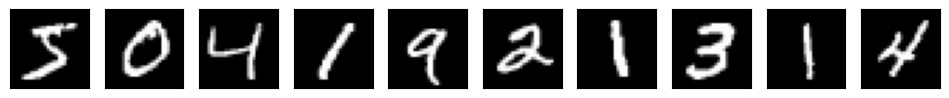

In [36]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
data_vis(x_train, range(10))

# Select a subset of data
x_train = x_train[:15000]
y_train = y_train[:15000]
x_test = x_test[:300]
y_test = y_test[:300]

# Create train and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

# Normalising our data points
x_train = x_train.astype('float32')/255
x_val = x_val.astype('float32')/255
x_test = x_test.astype('float32')/255

# Reshape images to train conventional ML algorithm and MLP
x_train_vec = data_reshape(x_train)
x_val_vec = data_reshape(x_val)
x_test_vec = data_reshape(x_test)

# Reshape images to train CNN
x_train_img = np.expand_dims(x_train, axis=3)
x_val_img = np.expand_dims(x_val, axis=3)
x_test_img = np.expand_dims(x_test, axis=3)

# Showing shape of our data
show_shapes(x_train_vec, x_train_img, y_train)

# One-hot encoding
y_train_hot = one_hot(y_train)
y_val_hot = one_hot(y_val)
y_test_hot = one_hot(y_test)

In [37]:
# Initialising support vector machine
model_svm = svm.SVC()

# Initialising multilayer perceptron
Input_block = Input(shape = (x_train_vec.shape[-1]))
out = Dense(512, activation = 'relu')(Input_block)
out = Dense(256, activation = 'relu')(out)
out = Dense(10, activation = 'softmax')(out)
model_MLP = Model(inputs = Input_block, outputs = out)

# Initialising convolutional neural network
Input_block = Input(shape = (x_train_img.shape[1:]))
out = Conv2D(32, kernel_size=(3, 3), activation='relu')(Input_block)
out = MaxPooling2D(pool_size=(2, 2))(out)
out = Flatten()(out)
out = Dense(128, activation='relu')(out)
out = Dropout(0.5)(out)
out = Dense(10, activation = 'softmax')(out)
model_CNN = Model(inputs = Input_block, outputs = out)


\MLP model

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_5 (Dense)             (None, 512)               401920    
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dense_7 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


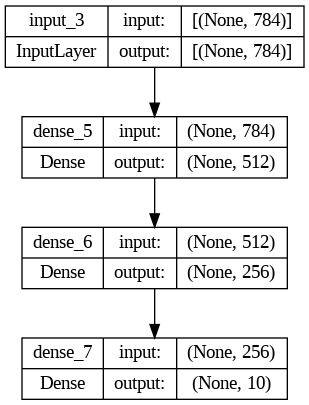

In [38]:
# Visualise MLP architecture
print("\MLP model\n")
model_MLP.summary()
plot_model(model_MLP, show_shapes=True)


CNN model

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               692352    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                               

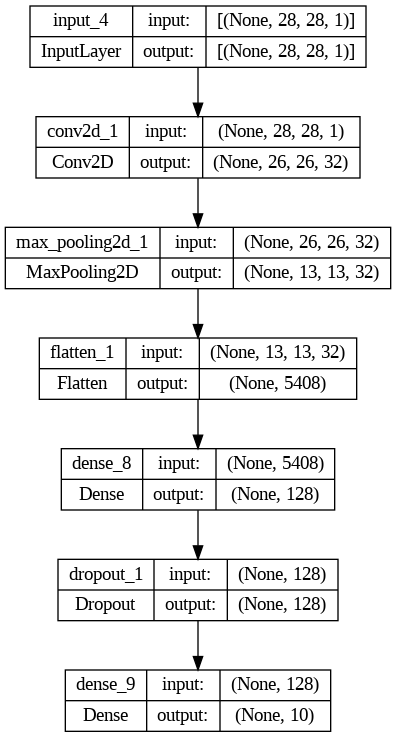

In [39]:
# Visualise CNN architecture
print("\nCNN model\n")
model_CNN.summary()
plot_model(model_CNN, show_shapes=True)

In [40]:
# Training SVM
print("Training a support vector machine ...")
model_svm.fit(x_train_vec, y_train)

Training a support vector machine ...


SVC()

In [41]:
# Training MLP
print("Training a multilayer perceptron ...")
model_MLP.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
fittedModel_MLP = model_MLP.fit(x_train_vec, y_train_hot, batch_size = 32, epochs = 10, verbose = 1, validation_data=(x_val_vec, y_val_hot))

Training a multilayer perceptron ...
Epoch 1/20
422/422 [==============================] - 5s 10ms/step - loss: 0.3461 - accuracy: 0.8944 - val_loss: 0.1567 - val_accuracy: 0.9547
Epoch 2/20
422/422 [==============================] - 5s 11ms/step - loss: 0.1295 - accuracy: 0.9603 - val_loss: 0.1344 - val_accuracy: 0.9553
Epoch 3/20
422/422 [==============================] - 6s 14ms/step - loss: 0.0788 - accuracy: 0.9751 - val_loss: 0.1084 - val_accuracy: 0.9660
Epoch 4/20
422/422 [==============================] - 4s 11ms/step - loss: 0.0491 - accuracy: 0.9851 - val_loss: 0.1192 - val_accuracy: 0.9647
Epoch 5/20
422/422 [==============================] - 6s 15ms/step - loss: 0.0343 - accuracy: 0.9879 - val_loss: 0.1137 - val_accuracy: 0.9660
Epoch 6/20
422/422 [==============================] - 8s 18ms/step - loss: 0.0267 - accuracy: 0.9904 - val_loss: 0.1423 - val_accuracy: 0.9647
Epoch 7/20
422/422 [==============================] - 6s 15ms/step - loss: 0.0222 - accuracy: 0.9925 - va

In [42]:
# Training CNN
print("Training a convolutional neural network ...")
model_CNN.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
fittedModel_CNN = model_CNN.fit(x_train_img, y_train_hot, batch_size = 32, epochs = 10, verbose = 1, validation_data=(x_val_img, y_val_hot))

Training a convolutional neural network ...
Epoch 1/10
422/422 [==============================] - 14s 31ms/step - loss: 0.5130 - accuracy: 0.8433 - val_loss: 0.1632 - val_accuracy: 0.9560
Epoch 2/10
422/422 [==============================] - 12s 28ms/step - loss: 0.2163 - accuracy: 0.9381 - val_loss: 0.1007 - val_accuracy: 0.9673
Epoch 3/10
422/422 [==============================] - 12s 28ms/step - loss: 0.1462 - accuracy: 0.9565 - val_loss: 0.0806 - val_accuracy: 0.9760
Epoch 4/10
422/422 [==============================] - 13s 30ms/step - loss: 0.1171 - accuracy: 0.9641 - val_loss: 0.0708 - val_accuracy: 0.9780
Epoch 5/10
422/422 [==============================] - 12s 28ms/step - loss: 0.0933 - accuracy: 0.9717 - val_loss: 0.0694 - val_accuracy: 0.9767
Epoch 6/10
422/422 [==============================] - 11s 26ms/step - loss: 0.0787 - accuracy: 0.9733 - val_loss: 0.0695 - val_accuracy: 0.9767
Epoch 7/10
422/422 [==============================] - 10s 25ms/step - loss: 0.0635 - accurac

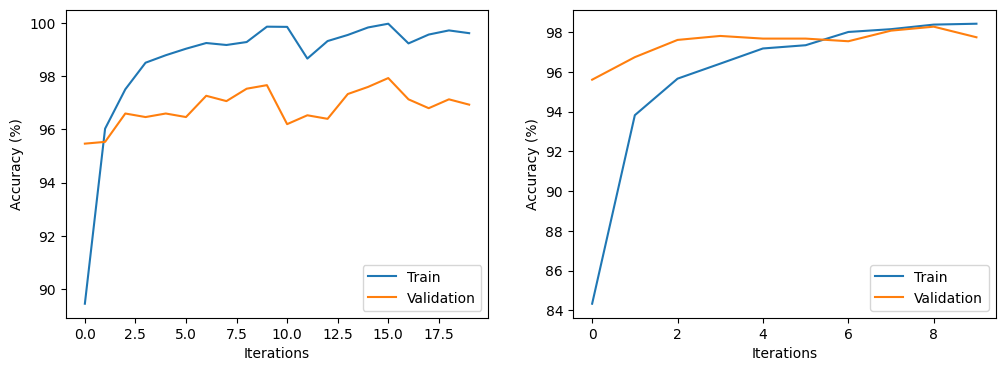

In [43]:
# Visualising the training process
training_vis(fittedModel_MLP, fittedModel_CNN)

In [44]:
# Evaluating models and comparison on the test data
score_svm = model_svm.score(x_test_vec, y_test)
score_MLP = model_MLP.evaluate(x_test_vec, y_test_hot, verbose=0)
score_CNN = model_CNN.evaluate(x_test_img, y_test_hot, verbose=0)

print("The SVM test accuracy:", round(score_svm*100,1), "%")
print("The MLP test accuracy:", round(score_MLP[1]*100,1), "%")
print("The CNN test accuracy:", round(score_CNN[1]*100,1), "%")

The SVM test accuracy: 97.0 %
The MLP test accuracy: 98.3 %
The CNN test accuracy: 99.0 %



Misclassified samples by SVM



[124, 259, 247, 149, 8, 245, 193, 151, 241]

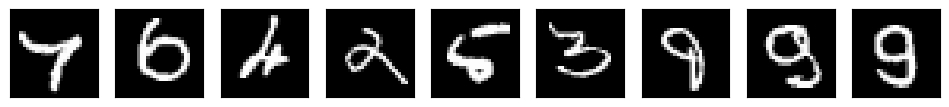

In [45]:
print("\nMisclassified samples by SVM\n")
vis_misClass(model_svm, x_test_vec, y_test, x_test)


Misclassified samples by MLP

10/10 [==============================] - 0s 3ms/step
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
10/10 [==============================] - 0s 3ms/step
[0.  0.  0.  0.  0.4 0.  0.6 0.  0.  0. ]
10/10 [==============================] - 0s 3ms/step
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
10/10 [==============================] - 0s 3ms/step
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
10/10 [==============================] - 0s 3ms/step
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


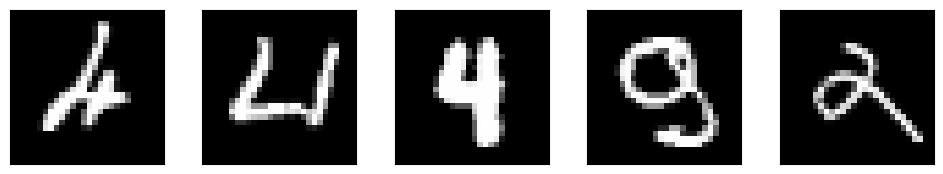

In [46]:
print("\nMisclassified samples by MLP\n")
out = vis_misClass(model_MLP, x_test_vec, y_test_hot, x_test)
for i in out:
  print(np.round(model_MLP.predict(x_test_vec)[i],1))


Misclassified samples by CNN

10/10 [==============================] - 0s 7ms/step
[0.  0.  0.  0.  0.9 0.  0.  0.  0.  0.1]
10/10 [==============================] - 0s 8ms/step
[0.  0.  0.  0.  0.  0.  0.  0.6 0.  0.4]
10/10 [==============================] - 0s 7ms/step
[0.  0.  0.  0.  0.  0.5 0.5 0.  0.  0. ]


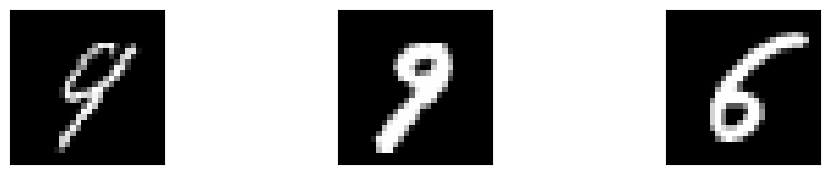

In [47]:
print("\nMisclassified samples by CNN\n")
out = vis_misClass(model_CNN, x_test_img, y_test_hot, x_test)
# print(out)
for i in out:
  print(np.round(model_CNN.predict(x_test_img)[i],1))